In [2]:
import numpy as np
import sys
sys.path.append("../code/")
from structure import *
from algo import *
from basic import *
from analysis import *
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from autograd.numpy import linalg as LA
import pickle
import itertools
from itertools import product
import calendar
from sklearn.metrics import mean_squared_error
%load_ext autoreload
%autoreload 2
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import numpy as np
import matplotlib
matplotlib.rcParams['ps.useafm']=True
matplotlib.rcParams['pdf.use14corefonts']=True
matplotlib.rcParams['text.usetex']=True

In [3]:
for year in [2014, 2015, 2016, 2017]:
    tensor, hid = get_tensor(year, 'artificial')
    print(year, tensor.shape[0])

2014 53
2015 93
2016 73
2017 44


In [5]:
# pd.DataFrame(improved_rate).plot(ax=ax[2], style='.-', title='updated season factor with regularization')
ind = [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']



In [59]:
year = 2017
result = {}
result['ActSense'] = np.load("../data/best-result-{}-{}.npy".format(year, 'active')).item()
result['Random'] = np.load("../data/best-result-{}-{}.npy".format(year, 'random')).item()
result['QBC'] = np.load("../data/best-result-{}-{}.npy".format(year, 'qbc')).item()
result['VBV'] = np.load("../data/best-result-{}-{}.npy".format(year, 'vb-new')).item()


In [60]:
mean = {}
for method in result.keys():
    mean[method] = pd.DataFrame(result[method]).mean(axis=1)

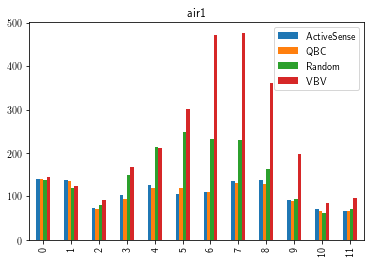

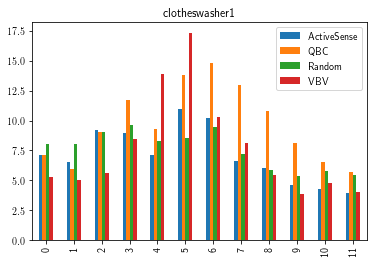

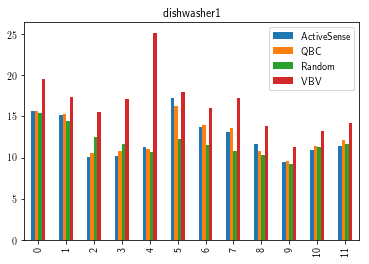

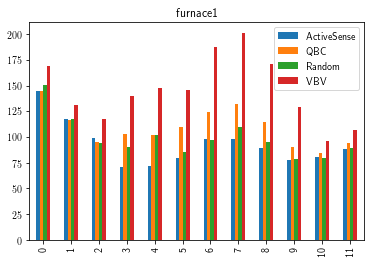

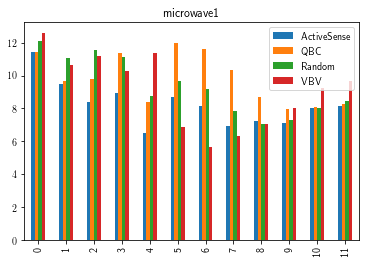

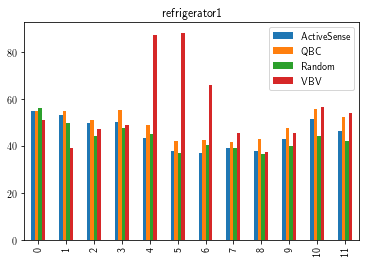

In [44]:
e = {}
for idx, appliance in enumerate(APPLIANCE_ORDER_OBSERVED[1:]):
    e['ActiveSense'] = result['ActSense'][appliance]
    e['Random'] = result['Random'][appliance]
    e['QBC'] = result['QBC'][appliance]
    e['VBV'] = result['VBV'][appliance]
    pd.DataFrame(e).plot(kind='bar', title=appliance)

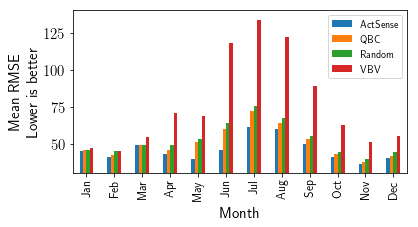

In [61]:

ax = pd.DataFrame(mean).plot(kind='bar', figsize=(6, 3))

ax.set_xlabel("Month", fontsize=15)
ax.set_xticks(ind)
ax.set_ylabel("Mean RMSE \n Lower is better", fontsize=15)
ax.set_ylim(ymin=30)
ax.tick_params(labelsize=15)
ax.set_xticklabels(month, rotation=90, fontsize=12)

fig = ax.get_figure()
# fig.tight_layout()
fig.savefig("../figure/{}_meanRMSE.pdf".format(year),format='pdf', bbox_inches='tight')

In [46]:
rate = {}
for method in result.keys():
    rate[method] = {}
    for t in range(12):
        rate[method][t] = 100 * (1 - mean[method][t] / mean['Random'][t])
    

In [47]:
pd.DataFrame(rate).max()

ActSense    35.060696
QBC         23.091107
Random       0.000000
VBV         -2.069897
dtype: float64

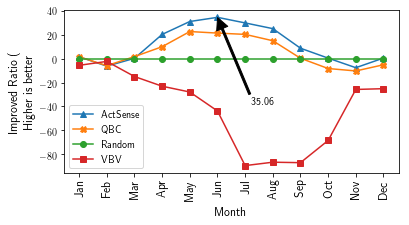

In [48]:
# fig, ax = plt.plot()
ax = pd.DataFrame(rate).plot(style=['^-', 'X-', 'o-', 's-'], figsize=(6, 3))
best_index = pd.Series(rate['ActSense']).argmax()

ax.annotate('{}%'.format(round(rate['ActSense'][best_index], 2)),
               xy=(best_index, rate['ActSense'][best_index]), xytext=(6.2, -40),
            arrowprops=dict(facecolor='black', shrink=0.003, width=2),horizontalalignment='left',
               verticalalignment='bottom'
            )
ax.set_xlabel("Month", fontsize=12)
ax.set_xticks(ind)
ax.set_xticklabels(month, rotation=90, fontsize=12)
ax.set_ylabel("Improved Ratio (%) \n Higher is better", fontsize=12)
# format_axes(ax)
fig = ax.get_figure()
# fig.tight_layout()
fig.savefig("../figure/{}_improved_ratio.pdf".format(year),format='pdf', bbox_inches='tight')

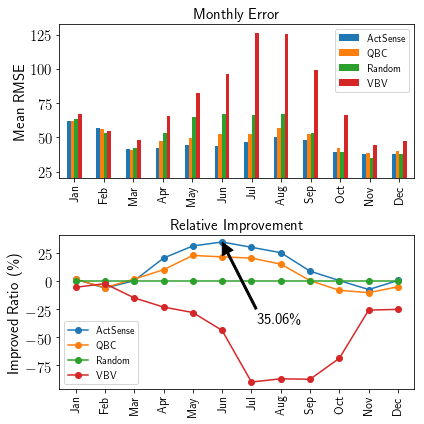

In [52]:
# exact accumulated error
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(6, 6))
ax = axes.flatten()
# calculate monthly error

df = pd.DataFrame(mean)
df = df.rename(index={0:'Jan', 1:'Feb', 2:'Mar', 3:'Apr', 4:'May', 5:'Jun', 6:'Jul', 7:'Aug', 8:'Sep', 9:'Oct', 10:'Nov', 11:'Dec'})   

df.plot(ax=ax[0], kind='bar')
ax[0].set_title('Monthly Error', fontsize=15)
ax[0].set_ylim(ymin=20)
# ax[1].legend(loc="lower center", ncol=2)
# ax[0].legend_.remove()
ax[0].tick_params(labelsize=15)
ax[0].set_ylabel("Mean RMSE", fontsize=15)
ax[0].set_xticklabels(month, fontsize=12, rotation=90)
# ax[0].set_xlabel("Month")
# fig.tight_layout()

df = pd.DataFrame(rate)
df = df.rename(index={0:'Jan', 1:'Feb', 2:'Mar', 3:'Apr', 4:'May', 5:'Jun', 6:'Jul', 7:'Aug', 8:'Sep', 9:'Oct', 10:'Nov', 11:'Dec'})   

# pd.DataFrame(improved_rate).plot(ax=ax[2], style='.-', title='updated season factor with regularization')
ind = [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

df.plot(ax=ax[1], marker='o')
ax[1].set_title('Relative Improvement', fontsize=15)
# ax[1].legend_.remove()
ax[1].set_ylabel("Improved Ratio (\%)", fontsize=15)
# ax[1].set_xlabel("Month")
ax[1].tick_params(labelsize=15)
ax[1].set_xticks(ind)
ax[1].set_yticks([-75, -50, -25, 0, 25])
ax[1].set_xticklabels(month, fontsize=12, rotation=90)

best_index = pd.Series(rate['ActSense']).argmax()

ax[1].annotate('{}\%'.format(round(rate['ActSense'][best_index], 2)),
               xy=(best_index, rate['ActSense'][best_index]), xytext=(6.2, -40),
            arrowprops=dict(facecolor='black', shrink=0.003, width=2),horizontalalignment='left',
               verticalalignment='bottom', fontsize=15
            )

# handles, labels = ax[0].get_legend_handles_labels()
# fig.legend(handles, labels, loc='lower center', ncol=4, bbox_to_anchor=(0.55, 1))

fig.tight_layout()
fig.savefig("../figure/{}_best_comparison.pdf".format(year),format='pdf', bbox_inches='tight')
# fig.savefig("../../KDD2019-ActiveSensing-Jia/figure/{}_best_comparison.pdf".format(year),format='pdf')




In [50]:
test = get_active_results(method='random', lambda1=5000,
                         lambda2=5000, lambda3=5000, k=5, latent_dimension=4)

In [61]:
r = test['prediction'].mean(axis=0)
r.shape

(12, 93, 7, 12)

In [68]:
error = {}
for idx, appliance in enumerate(APPLIANCE_ORDER_OBSERVED[1:]):
    error[appliance] = {}
for t in range(12):
    for idx, appliance in enumerate(APPLIANCE_ORDER_OBSERVED[1:]):
#         print(idx, appliance)
        
        error[appliance][t] = np.sqrt(mean_squared_error(r[t, :, idx+1, t], tensor[:, idx+1, t]))
        

In [71]:
pd.DataFrame(error).mean(axis=1)

0     61.918519
1     51.145261
2     39.793465
3     51.196424
4     60.737184
5     58.750523
6     57.069648
7     61.789866
8     49.745313
9     36.893180
10    32.144180
11    35.310552
dtype: float64

In [75]:
pd.DataFrame(result['Random']).mean(axis=1)

0     63.462597
1     53.383340
2     41.951456
3     53.188343
4     64.617857
5     66.940849
6     66.537617
7     67.339547
8     53.059207
9     39.230631
10    35.191675
11    37.892512
dtype: float64